In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def generate_data(n_samples=1000):
    X = torch.linspace(-3, 3, n_samples).reshape(-1, 1)
    y = X**3 + 0.3 * torch.randn(n_samples, 1)
    return X, y

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
class SimpleNNWithDropout(nn.Module):
    def __init__(self):
        super(SimpleNNWithDropout, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=500):
    train_losses, val_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        train_loss = running_loss / len(train_loader.dataset)

        model.eval()
        running_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_loss += loss.item() * inputs.size(0)
        val_loss = running_loss / len(val_loader.dataset)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if epoch % 50 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    return train_losses, val_losses

In [6]:
def plot_losses(train_losses, val_losses, title):
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [7]:
X, y = generate_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create data loaders
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_val, y_val), batch_size=32, shuffle=False)


Training model with dropout...
Epoch [0/500], Train Loss: 30.3314, Val Loss: 10.4431
Epoch [50/500], Train Loss: 0.2025, Val Loss: 0.1361
Epoch [100/500], Train Loss: 0.1211, Val Loss: 0.1874
Epoch [150/500], Train Loss: 0.1491, Val Loss: 0.1037
Epoch [200/500], Train Loss: 0.1137, Val Loss: 0.2338
Epoch [250/500], Train Loss: 0.2602, Val Loss: 0.2080
Epoch [300/500], Train Loss: 0.1959, Val Loss: 0.1815
Epoch [350/500], Train Loss: 0.1130, Val Loss: 0.0980
Epoch [400/500], Train Loss: 0.1365, Val Loss: 0.1366
Epoch [450/500], Train Loss: 0.1536, Val Loss: 0.1000


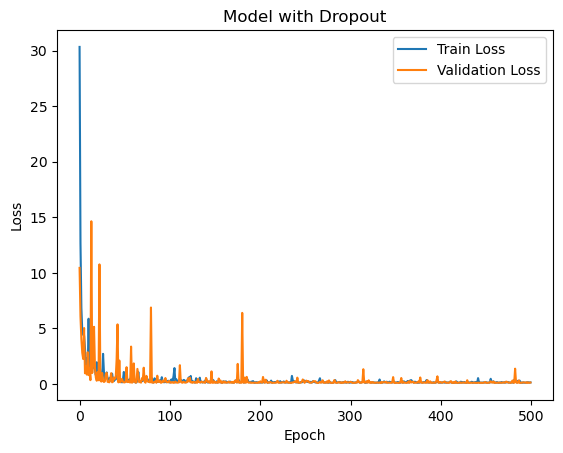

In [8]:
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
print("Training model with dropout...")
train_losses, val_losses = train_model(model, criterion, optimizer, train_loader, val_loader)
plot_losses(train_losses, val_losses, "Model with Dropout")

Training model without dropout...
Epoch [0/500], Train Loss: 38.6030, Val Loss: 13.5446
Epoch [50/500], Train Loss: 5.5172, Val Loss: 3.4547
Epoch [100/500], Train Loss: 3.2450, Val Loss: 9.9846
Epoch [150/500], Train Loss: 2.3918, Val Loss: 8.1101
Epoch [200/500], Train Loss: 2.6299, Val Loss: 10.0322
Epoch [250/500], Train Loss: 1.6280, Val Loss: 13.4155
Epoch [300/500], Train Loss: 1.3600, Val Loss: 13.9190
Epoch [350/500], Train Loss: 0.9870, Val Loss: 17.8259
Epoch [400/500], Train Loss: 1.0274, Val Loss: 21.9470
Epoch [450/500], Train Loss: 1.0464, Val Loss: 19.0281


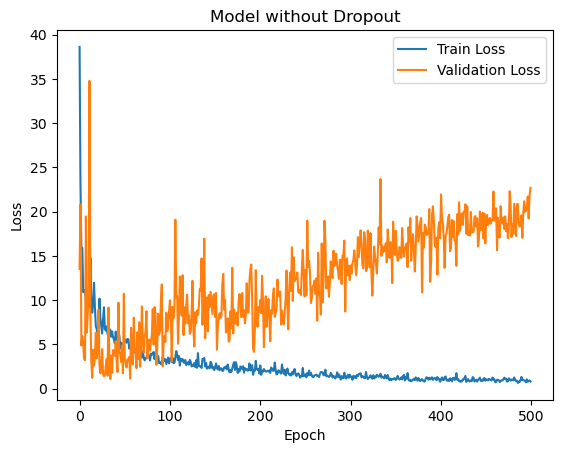

In [9]:
model_with_dropout = SimpleNNWithDropout()
optimizer = optim.SGD(model_with_dropout.parameters(), lr=0.01)
print("Training model without dropout...")
train_losses_dropout, val_losses_dropout = train_model(model_with_dropout, criterion, optimizer, train_loader, val_loader)
plot_losses(train_losses_dropout, val_losses_dropout, "Model without Dropout")